In [29]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [30]:
# load and view data
file_path = os.path.join('SBA2011-2019', 'SBAHomeDataApproval2011_2019.xlsx')
data = pd.read_excel(file_path)
print(f"Shape of the data is: {data.shape}")
data.head()

Shape of the data is: (21958, 16)


,FiscalYear,SBA Physical Declaration Number,SBA EIDL Declaration Number,FEMA Disaster Number,SBA Disaster Number,Damaged Property City Name,Damaged Property Zip Code,Damaged Property County/Parish Name,Damaged Property State Code,Total Verified Loss,Verified Loss Real Estate,Verified Loss Content,Total Approved Loan Amount,Approved Amount Real Estate,Approved Amount Content,LoanApproved
0,2011,12351,12352,NaN,MN-00027,AMBOY,56010,BLUE EARTH,MN,79199.0,50754.0,28445.0,28800.0,17500.0,11300.0,YES
1,2011,12351,12352,NaN,MN-00027,BLOOMING PRAIRIE,55917,STEELE,MN,44971.0,27821.0,17150.0,40000.0,22900.0,17100.0,YES
2,2011,12351,12352,NaN,MN-00027,ELLENDALE,56026,STEELE,MN,44162.0,28837.0,15325.0,14000.0,11600.0,2400.0,YES
3,2011,12351,12352,NaN,MN-00027,EYOTA,55934,OLMSTED,MN,87512.0,68937.0,18575.0,33700.0,32100.0,1600.0,YES
4,2011,12351,12352,NaN,MN-00027,FAIRMONT,56031,MARTIN,MN,12876.0,11726.0,1150.0,12100.0,11000.0,1100.0,YES


In [49]:
# investigate rows with null values
data[data.isnull().any(axis=1)]

,FiscalYear,SBA Physical Declaration Number,SBA EIDL Declaration Number,FEMA Disaster Number,SBA Disaster Number,Damaged Property City Name,Damaged Property Zip Code,Damaged Property County/Parish Name,Damaged Property State Code,Total Verified Loss,Verified Loss Real Estate,Verified Loss Content,Total Approved Loan Amount,Approved Amount Real Estate,Approved Amount Content,LoanApproved
0,2011,12351,12352,NaN,MN-00027,AMBOY,56010,BLUE EARTH,MN,79199.0,50754.00,28445.0,28800.0,17500.0,11300.0,YES
1,2011,12351,12352,NaN,MN-00027,BLOOMING PRAIRIE,55917,STEELE,MN,44971.0,27821.00,17150.0,40000.0,22900.0,17100.0,YES
2,2011,12351,12352,NaN,MN-00027,ELLENDALE,56026,STEELE,MN,44162.0,28837.00,15325.0,14000.0,11600.0,2400.0,YES
3,2011,12351,12352,NaN,MN-00027,EYOTA,55934,OLMSTED,MN,87512.0,68937.00,18575.0,33700.0,32100.0,1600.0,YES
4,2011,12351,12352,NaN,MN-00027,FAIRMONT,56031,MARTIN,MN,12876.0,11726.00,1150.0,12100.0,11000.0,1100.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21953,2019,16141,16142,NaN,IL-00056,UNIVERSITY PARK,60484,Will,IL,NaN,21729.00,18075.0,0.0,0.0,0.0,NO
21954,2019,16141,16142,NaN,IL-00056,AURORA,60506,Will,IL,NaN,NaN,NaN,0.0,NaN,NaN,NO
21955,2019,16141,16142,NaN,IL-00056,CHICAGO,60621,Cook,IL,NaN,0.00,4565.0,0.0,0.0,0.0,NO
21956,2019,16141,16142,NaN,IL-00056,CHICAGO,60628,Cook,IL,NaN,37469.66,7300.0,44800.0,37500.0,7300.0,YES


In [32]:
# only take rows of businesses that FEMA Disaster Number is not null

data_fema_na = data[data['FEMA Disaster Number'].notna()]

In [50]:
# drop lenders with loans of 5 or more
counts = data_fema_na['LoanApproved'].value_counts()

# drop categorical columns
data_clean = data_fema_na.drop(columns=['Total Verified Loss', 'Verified Loss Real Estate', 'Verified Loss Content',
                             'Approved Amount Real Estate', 'Approved Amount Content',
                                'Damaged Property City Name', 'Damaged Property County/Parish Name',
                                'Damaged Property State Code'], axis=1)

# loan_data = pd.get_dummies(data, columns=["BusinessType"])

data_clean.head()
data_clean.dtypes

data.isnull().sum()

FiscalYear                                0
SBA Physical Declaration Number           0
SBA EIDL Declaration Number               0
FEMA Disaster Number                   4246
SBA Disaster Number                       0
Damaged Property City Name                1
Damaged Property Zip Code                 0
Damaged Property County/Parish Name       0
Damaged Property State Code               0
Total Verified Loss                    2119
Verified Loss Real Estate               516
Verified Loss Content                   516
Total Approved Loan Amount                1
Approved Amount Real Estate             520
Approved Amount Content                 520
LoanApproved                              0
dtype: int64

In [61]:
# Assign X (data) and y(target)
X = data_clean['SBA Physical Declaration Number']
y = data_clean.drop(["SBA EIDL Declaration Number", 'Damaged Property Zip Code', 'SBA Physical Declaration Number', 'FiscalYear', 'FEMA Disaster Number', 'SBA Disaster Number', 'LoanApproved'], axis=1)
print(X.shape, y.shape)



data_clean.isnull().sum()

data_clean = data_clean[data_clean['Total Approved Loan Amount'].notna()]

X = X.values.reshape(-1, 1)

(17711,) (17711, 1)


In [62]:
# Split our data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# X_train = X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)

In [66]:
# Create a logistic Regression Model

from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# Fit model using the training data
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
# evaluate the model's performance using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.004283926808400951
Testing Data Score: 0.005042629348243066


In [71]:
# Make predictions
predictions = classifier.predict(y_test)
print(f"First 10 Predictions:   {predictions[:10]}")
# print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [[-3.38010081e+06]
 [ 1.10621038e+08]
 [ 7.73610313e+07]
 [ 3.63809887e+07]
 [ 9.88326992e+06]
 [ 1.53105135e+07]
 [-3.38010081e+06]
 [ 4.56392278e+07]
 [-3.38010081e+06]
 [ 7.64852255e+06]]


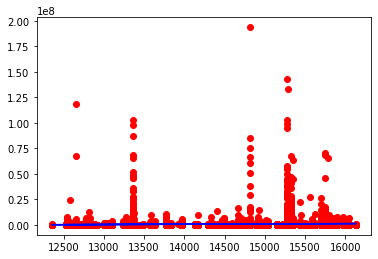

In [75]:
viz = plt
viz.scatter(X_train, y_train, color = 'red')
viz.plot(X_train, classifier.predict(X_train), color='blue')
viz.show()

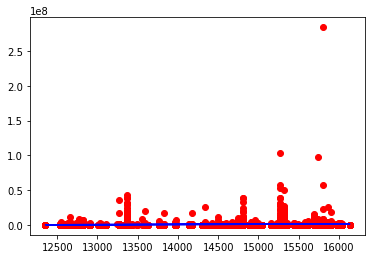

In [76]:
viz = plt
viz.scatter(X_test, y_test, color = 'red')
viz.plot(X_train, classifier.predict(X_train), color='blue')
viz.show()

In [79]:
y_pred = classifier.predict(16141)

ValueError: Expected 2D array, got scalar array instead:
array=16141.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [72]:
# View predictions along with their probabilities of being within each class 
##  this will be the difficult part of our project because data is not binary like example: male/female
# probs = classifier.predict_proba(X_test)
# pred_df = pd.DataFrame({
#     "Prediction": predictions, 
#     "Actual": y_test, 
#     "P(YES)": [p[0] for p in probs], 
#     "P(NO)": [p[1] for p in probs]
#     }).reset_index(drop=True)

# pred_df.head(10)

In [45]:
# Model Evaluation
# Create a Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predictions)

array([[  2, 121],
       [ 22, 232]], dtype=int64)

In [46]:
# Label the confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Neg: {tn}   False Pos: {fp}")
print(f"False Neg: {fn}  True Pos: {tp}")

True Neg: 2   False Pos: 121
False Neg: 22  True Pos: 232


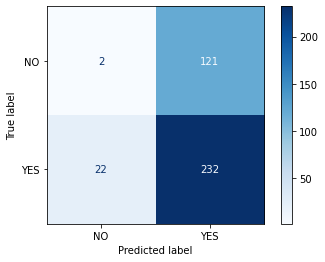

In [47]:
# Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap="Blues")

In [48]:
# Precision and Recall
### we don't technically have a "positive" label, like we would if we were classifying emails as Spam, or patients as having cancer. 
## This means that we need to tell our precision and recall functions which class label we want to consider to be our "positive" class i.e. which lender
from sklearn.metrics import precision_score, recall_score, f1_score

In [49]:
## Random tests of lenders first test is YES, the lender with the most loans
precision_score(y_test, predictions, pos_label="YES")

0.6572237960339944

In [50]:
## Random tests of lenders second test is NO, random test of lender with lower loan count of 10 loans
precision_score(y_test, predictions, pos_label="NO")

0.08333333333333333

In [51]:
#  what is the harmonic mean of YES Texas from first test
f1_score(y_test, predictions, pos_label="YES")

0.7644151565074135

In [52]:
#  what is the harmonic mean of NO from second test
f1_score(y_test, predictions, pos_label="NO")

0.027210884353741496